# <font color=blue>Assignments for "Feature Engineering - Part 2"</font>

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
PATH ='/content/drive/MyDrive/Colab Notebooks/Datajarlabs/6-Mastering_the_Exploratory_Data_Analysis'
os.chdir(PATH)

In [ ]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df.columns)

25

**(1)** Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [ ]:
df['WEIGHTED_AVG'] = ((df['GRADES_4_G'] * ((df['AVG_MATH_4_SCORE'] + df['AVG_READING_4_SCORE']) / 2)) + (df['GRADES_8_G'] * ((df['AVG_MATH_8_SCORE'] + df['AVG_READING_8_SCORE']) / 2))) / (df['GRADES_4_G'] + df['GRADES_8_G'])
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_AVG
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,424662.0,432279.0,1852.0,56541.0,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,236.675051
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,55715.0,247005.0,1883.0,9475.0,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,246.085039
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,303924.0,864642.0,9376.0,76365.0,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,241.024367
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,170767.0,247245.0,2573.0,36391.0,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,242.585939
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,2995767.0,7341541.0,114939.0,456941.0,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,237.893897


**(2)** What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

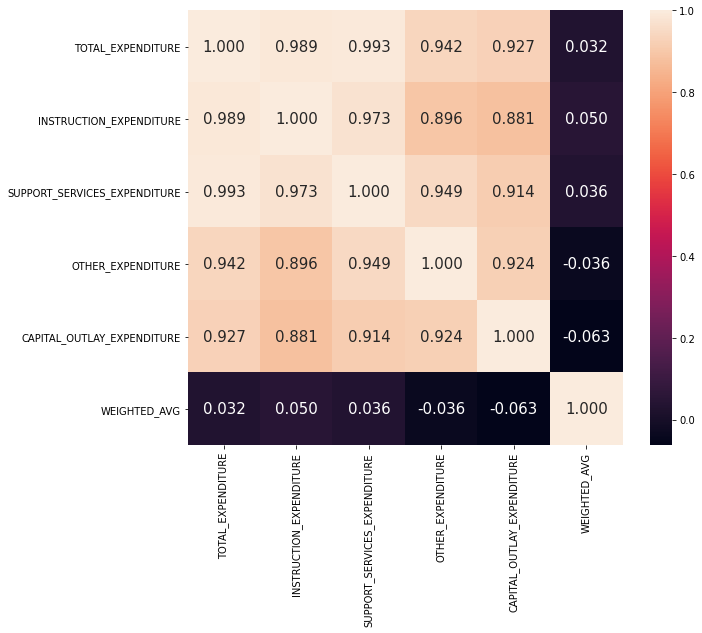

In [ ]:
# correlation between numerical features
plt.figure(figsize=(10, 8))
feature_corr = df[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE','WEIGHTED_AVG']].corr()
sns.heatmap(feature_corr, annot=True, square=True,annot_kws={'size': 15}, fmt='.3f',cbar=True)

plt.show()

There is a higher correlation between the **Weighted Average** and **Instuction Expenditure** compared to other features.

**(3)** Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [ ]:
expends = df[['INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].values

In [ ]:
X = StandardScaler().fit_transform(expends)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)

In [ ]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.94233335 0.03503443 0.0190434  0.00358882]
[94.23 97.73 99.63 99.99]


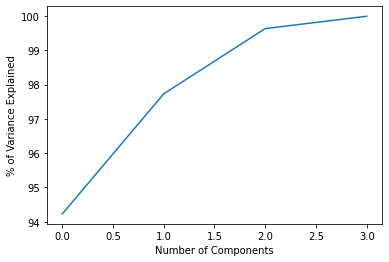

In [ ]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.show()

**94.23% the total variance can be explained by the first component** 

**(4)** What is the correlation between the GPA you created and the first 
principal component?

In [ ]:
fpc = pd.Series(pd.DataFrame(principalComponents).iloc[:,0],name='first_principal_component')

In [ ]:
fpc.head()

0   -0.708680
1   -1.370094
2   -0.613472
3   -1.137075
4    7.749451
Name: first_principal_component, dtype: float64

In [ ]:
pd.concat([df['WEIGHTED_AVG'].reset_index(drop=True), fpc], axis=1).corr()

,WEIGHTED_AVG,first_principal_component
WEIGHTED_AVG,1.000000,-0.002786
first_principal_component,-0.002786,1.000000


**(5)** When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

The probability of multicollinearity is very high in the correlation that the features create among themselves and higher than the correlation it creates with the first principal component. However, multicollinearity is not desirable, so I would choose first principal component